# Import Packages

In [1]:
#The purpose of this program is to plot the different definitions of the Ramberg-Osgood Equation
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate
import sympy
from sympy import *
import pandas as pd
%matplotlib inline

from ipywidgets import *

# Import and View Data

In [2]:
#Import data as pandas dataframe
df1 = pd.read_csv('/Users/tbond/Desktop/Ti64 Samples-S21.csv')

In [3]:
df1.head(5)

,Time,Displacement,Force,Strain 1,Tensile strain (Displacement),Tensile displacement,Tensile stress
0,0.0,0.0003,-0.0006,0.0016,0.0015,0.0003,-0.1474
1,0.1,0.0005,0.0009,0.0025,0.0024,0.0005,0.2307
2,0.2,0.0008,0.0047,0.0032,0.0036,0.0008,1.1957
3,0.3,0.0010,0.0100,0.0033,0.0047,0.0010,2.5620
4,0.4,0.0017,0.0156,0.0056,0.0082,0.0017,3.9764


In [4]:
df1.describe()

,Time,Displacement,Force,Strain 1,Tensile strain (Displacement),Tensile displacement,Tensile stress
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,212.348285,1.769754,3.394486,6.188415,8.427404,1.769754,865.940066
std,122.640670,1.022349,1.284671,5.170864,4.868330,1.022349,327.722061
min,0.000000,0.000300,-0.000600,0.001600,0.001500,0.000300,-0.147400
25%,106.175000,0.884750,3.680425,0.793475,4.212950,0.884750,938.892100
50%,212.350000,1.769650,3.971300,5.553100,8.426900,1.769650,1013.085050
75%,318.525000,2.654575,4.112400,10.449200,12.640825,2.654575,1049.087175
max,423.551800,3.612900,4.170100,16.757400,17.204100,3.612900,1063.812300


In [5]:
#Remove nonsense data at the end
df1 = df1[0:4200]

In [6]:
#Gage dimensions of selected samples
org_width = 0.00199771
org_thick = 0.00196342

org_area = org_width*org_thick
print('Gage cross-sectional area = {:.4e}'.format(org_area)) 

Gage cross-sectional area = 3.9223e-06


In [7]:
#Calculation of new cross-sectional area and stress for each data point
strain = df1['Strain 1'].div(100)
lat_strain = strain*0.33

width = (-lat_strain * org_width) + org_width
thick = (-lat_strain * org_thick) + org_thick
area = width * thick

stress = (df1['Force']*1000)/area

In [8]:
#Convert dataframes to numpy arrays for plotting
strain_arr = strain.to_numpy()
stress_arr = stress.to_numpy()
strain_arr

array([1.60000e-05, 2.50000e-05, 3.20000e-05, ..., 1.64784e-01,
       1.64850e-01, 1.64921e-01])

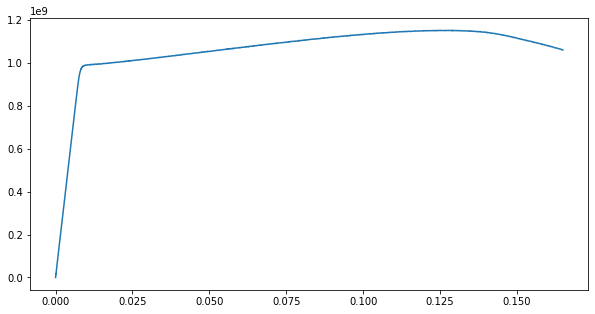

In [9]:
plt.figure(figsize=(10,5))
plt.plot(strain_arr, stress_arr)

# Ramberg Osgood Version 1 - Using K from Hollomon strain hardening

In [10]:
%%latex
\begin{align}
\text{Ramberg Osgood Version 1 - Using K from Hollomon strain hardening}\\
\epsilon &= \epsilon_e + \epsilon_p\\
\epsilon &= \frac{\sigma}{E} + \left(\frac{\sigma}{H}\right)^{1/n}\\
n &= \frac{log(\sigma_2/\sigma_1)}{log(\epsilon_2/\epsilon_1)}\\
K &= H = \frac{\sigma_1}{E_1^n}\\
\end{align}

<IPython.core.display.Latex object>

Parameters from experiments

In [11]:
E_lat = 120*10**9 #Young's Modulus, Pa
E_long = 110*10**9 #Young's Modulus, Pa
ys_lat = 961*10**6 #Lateral yield strength, Pa
ys_long = 840*10**6 #Longitudinal yield strength, Pa

n_lat = 14 #Ramberg osgood parameter 1/n
n_long = 17 #Ramberg osgood parameter 1/n
K_lat = 1.28*10**9 #Strengthening coefficient, Pa
K_long = 1.10*10**9 #Strengthening coefficient, Pa

mat = 'Ti-6Al-4V' #Material type

In [12]:
#Stress Range, Pa
s_lat = np.linspace(0,1150*10**6,100)
s_long = np.linspace(0,1000*10**6,100)

#Ramberg Osgood Version 1 Using K from Hollomon hardening
e_lat = (s_lat/E_lat) + (s_lat/K_lat)**n_lat
e_long = (s_long/E_long) + (s_long/K_long)**n_long

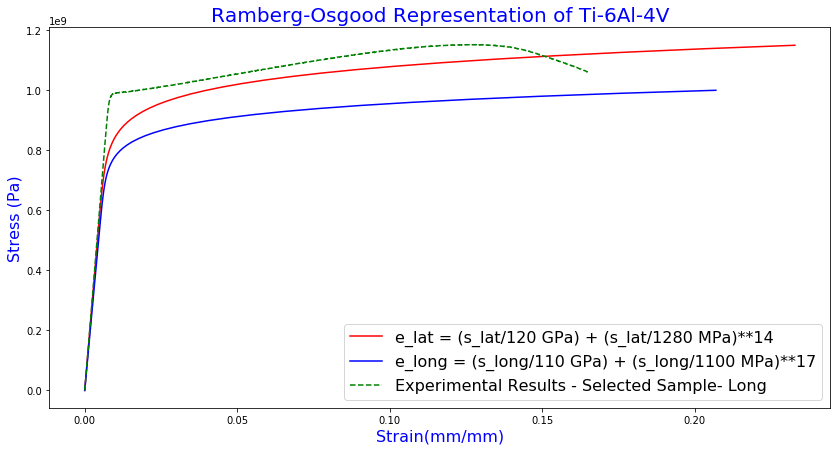

In [13]:
plt.figure(figsize=(14,7))
plt.plot(e_lat, s_lat, '-r', label='e_lat = (s_lat/{:.0f} GPa) + (s_lat/{:.0f} MPa)**{}'.format(E_lat/10**9,K_lat/10**6,n_lat), color='red')
plt.plot(e_long, s_long, '-r', label='e_long = (s_long/{:.0f} GPa) + (s_long/{:.0f} MPa)**{}'.format(E_long/10**9,K_long/10**6,n_long), color='blue')
plt.plot(strain_arr, stress_arr, label = "Experimental Results - Selected Sample- Long", color='green', linestyle='--')
plt.title('Ramberg-Osgood Representation of ' + mat, fontsize=20, color='blue')
plt.xlabel('Strain(mm/mm)', fontsize=16, color='blue')
plt.ylabel('Stress (Pa)', fontsize=16,color='blue')
plt.legend(loc='lower right', fontsize=16)

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

plt.savefig('ram_os_Ti64.png')

# Ramberg Osgood Version 1.2 Using K from Hollomon hardening, ideal formulation

In [14]:
#Parameters assuming ideal (logarithmic) strain hardening curve
#Inverse of strain hardening (1/n)
n_lat_i = 12
n_lon_i = 12
#Strengthening coefficient
K_lat_i = 1.66*10**9
K_lon_i = 1.43*10**9

In [15]:
#Stress range
Is1 = np.linspace(0,1400*10**6,100)
Is2 = np.linspace(0,1200*10**6,100)
#Ramberg Osgood stress-strain curve
Ie1 = (Is1/E_lat) + (Is1/K_lat_i)**n_lat_i
Ie2 = (Is2/E_long) + (Is2/K_lon_i)**n_lon_i

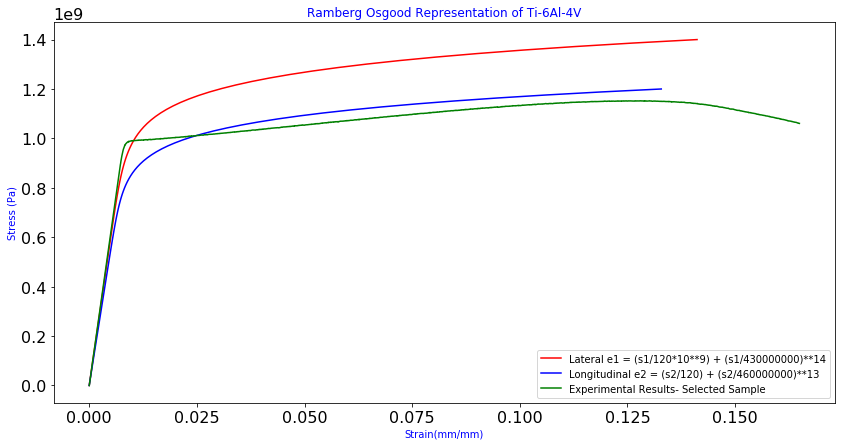

In [16]:
plt.figure(figsize=(14,7))
plt.plot(Ie1, Is1, '-r', label='Lateral e1 = (s1/120*10**9) + (s1/430000000)**14', color='red')
plt.plot(Ie2, Is2, '-r', label='Longitudinal e2 = (s2/120) + (s2/460000000)**13', color='blue')
plt.plot(strain_arr, stress_arr, label = "Experimental Results- Selected Sample", color='green')
plt.title('Ramberg Osgood Representation of ' + mat, color='blue')
plt.xlabel('Strain(mm/mm)', color='blue')
plt.ylabel('Stress (Pa)', color='blue')
plt.legend(loc='lower right')
plt.show()

# Ramberg Osgood Version 2 - 0.2% Offset Strain

In [17]:
%%latex
\begin{align}
\text{Ramberg Osgood Version 2 - 0.2% Offset Strain}\\ 
\epsilon = \frac{\sigma}{E} + 0.002\left(\frac{\sigma}{\sigma_y}\right)^{1/n}\\
\end{align}

<IPython.core.display.Latex object>

In [18]:
#Stress range
ps1 = np.linspace(0,1300*10**6,100)
ps2 = np.linspace(0,1100*10**6,100)

#Ramberg Osgood Version 2- Useing Yeild Stress and Strain
pere1 = (((ps1/E_lat) + 0.002*(ps1/ys_lat)**n_lat))*100
pere2 = (((ps2/E_long) + 0.002*(ps2/ys_long)**n_long))*100

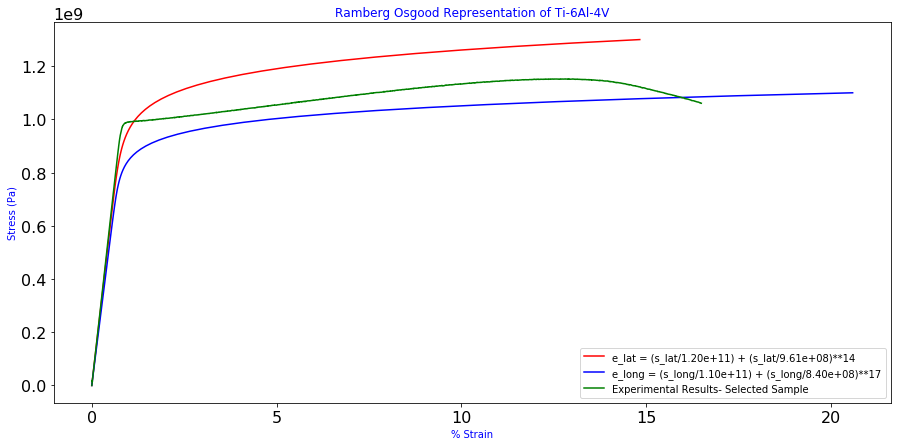

In [19]:
plt.figure(figsize=(15,7))
plt.plot(pere1, ps1, '-r', label='e_lat = (s_lat/{:.2e}) + (s_lat/{:.2e})**{}'.format(E_lat,ys_lat,n_lat), color='red')
plt.plot(pere2, ps2, '-r', label='e_long = (s_long/{:.2e}) + (s_long/{:.2e})**{}'.format(E_long,ys_long,n_long), color='blue')
plt.plot(strain_arr*100, stress_arr, label = "Experimental Results- Selected Sample", color='green')
plt.title('Ramberg Osgood Representation of ' + mat, color='blue')
plt.xlabel('% Strain', color='blue')
plt.ylabel('Stress (Pa)', color='blue')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

# Ramberg Osgood Version 3- Using K derived in Ramberg-Osgood Paper

In [20]:
%%latex
\begin{align}
\text{Ramberg Osgood Version 3- Using K derived in Ramberg-Osgood Paper}\\ 
\epsilon = \frac{\sigma}{E} + K\left(\frac{\sigma}{E}\right)^{n}\\
K = \epsilon_y\left(\frac{E}{\sigma_y}\right)^{n}\\
\end{align}

<IPython.core.display.Latex object>

In [21]:
#Parameters for original Ramberg-Osgood formulation
K_lat_o = 2*10**33 #Strengthening coefficient
K_lon_o = 6*10**34 #Strengthening coefficient

In [22]:
#Stress range
rs_lat = np.linspace(0,450*10**6,100)
rs_lon = np.linspace(0,900*10**6,100)

#Ramberg Osgood Version 3- Using K derived in Ramberg Osgood Paper
Re1 = ((rs_lat/E_lat) + (K_lat_o)*(rs_lat/E_lat)**n_lat)
Re2 = ((rs_lon/E_long) + (K_lon_o)*(rs_lon/E_long)**n_long)

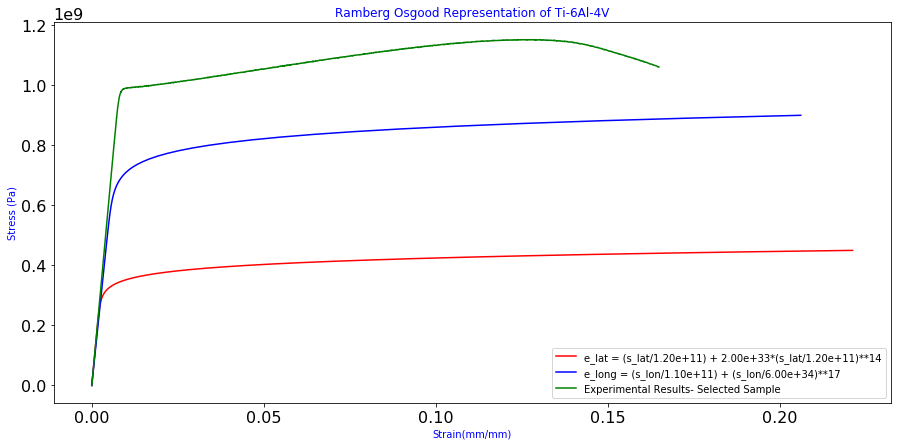

In [23]:
plt.figure(figsize=(15,7))
plt.plot(Re1, rs_lat, '-r', label='e_lat = (s_lat/{:.2e}) + {:.2e}*(s_lat/{:.2e})**{}'.format(E_lat,K_lat_o,E_lat,n_lat), color='red')
plt.plot(Re2, rs_lon, '-r', label='e_long = (s_lon/{:.2e}) + (s_lon/{:.2e})**{}'.format(E_long,K_lon_o,n_long), color='blue')
plt.plot(strain_arr, stress_arr, label = "Experimental Results- Selected Sample", color='green')
plt.title('Ramberg Osgood Representation of ' + mat, color='blue')
plt.xlabel('Strain(mm/mm)', color='blue')
plt.ylabel('Stress (Pa)', color='blue')
plt.legend(loc='lower right')
#plt.grid()
plt.show()